# Viscoelasticity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:q
    style = json.load(fp)
    
plt.rcParams.update(style) 

## Maxwell Model 

![Maxwell](img/maxwell.png)

Combing back to the Maxwell model, we have a serial combination of viscous and elastic element. Thus both elements feel the same stress $\sigma$ and the deformation is the sum of the elastic and viscous deformation, i.e. $\gamma=\gamma_e+\gamma_v$.

We therefore find 

$$
\sigma=G_M\gamma_e= \eta_M\frac{d\gamma}{dt}
$$

or 

$$
\gamma_e=\frac{\eta_M}{G_M}\frac{d\gamma_v}{dt}
$$

where $\eta_M/G_M$ defines a timescale for the viscous relaxation. Such a timescale is always present in viscoelastic materials. In most materials even multiple timescales are relevant.

In the following sections we explore the response of a viscoelastic material to different pertubations. They can be either formed by a **step strain**, a **steady shear** or a **step stress or creep**.

## Stress Relaxation after Step Strain

Here we impose a step strain $\gamma$ at a time $t=0$, such that the strain is constant for $t>0$. Depending on the material we will get a different response. If we have for example an

- **elastic solid** will repond with a jump in the stress according to $G\gamma$ and the stress will stay constant as long as the strain is constant
- **Newtonian liquid** will respond with a stress spike that instantaneously decays to zero 
- **viscoelastic system** will respond with some time dependent stress $\sigma(t)$

Due to the time dependence of the stress $\sigma(t)$ for a viscoelastic material we can generalize Hooke's law to

$$
G(t)=\frac{\sigma(t)}{\gamma}
$$

The plot shows the reponse of either a viscoelastic liquid or a viscoelastic solid. The latter comprise a general elastic part, which lets the stress converge for infinity time to some constant value 

$$
G_{\rm eq}=\lim_{t\rightarrow \infty} G(t)
$$


For viscoelestic liquids this residual stress is absent and the stress decays to zero.

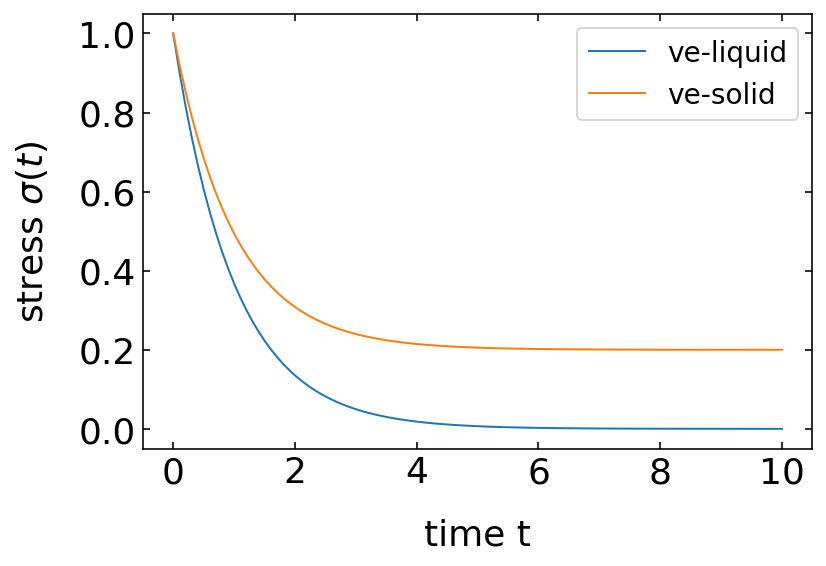

In [6]:
t=np.linspace(0,10,100)
plt.plot(t,np.exp(-t),label="ve-liquid")
plt.plot(t,0.8*np.exp(-t)+0.2,label="ve-solid")
plt.xlabel("time t")
plt.ylabel(r"stress $\sigma(t)$");plt.legend()
plt.show()

The Maxwell model, which is represented by a viscous dashpot element and an elastic spring represents such a viscoelastic liquid. The elastic strain thereby is

$$
\gamma_e=\frac{\eta_M}{G_M}\frac{d\gamma_v}{dt}=\tau_M\frac{d\gamma_v}{dt}
$$

Since the two elements are in series the elastic strain is also expressed by

$$
\gamma_e=\gamma-\gamma_v(t)
$$

Separation off variables leads to

$$
\frac{d\gamma_v(t)}{\gamma-\gamma_v(t)}=\frac{dt}{\tau_M}
$$

from which we obtain

$$
\ln(\gamma-\gamma_v(t))=\frac{-t}{\tau_M}+C
$$

with $C=\ln(\gamma)$ based on the initial condition that $\gamma(t=0)=\gamma$. As a result we obtain 

$$
\gamma_e(t)=\gamma-\gamma_v(t)=\gamma \exp\left (- \frac{t}{\tau_M} \right )
$$

and for the stress

$$
\sigma(t)=G_M\gamma_e(t)=G_M \gamma \exp \left ( -\frac{t}{\tau_M}\right )
$$

Thus in the Maxwell model, the stress relaxation has a simple exponential decay with the characteristic time constant $\tau_M$. Such a characteristic time constant is characteristic for all viscoelastic materials. Many materials, e.g., polymers have multiple relaxation modes, each with its own time constant $\tau$ as we will see later.It turns out, that any stress relaxation modulus can be described by a series of Maxwell elements. 

### Boltzmann Superposition

The mechanical response of all materials has a region of linear response, where the relaxation modulus is independent of the strain. A manifestation of this linear response is the Boltzmann superposition principle. 

Stress from any combination of small step strains is simply the linear combination of stresses resulting from each individual step.

If this individual strain step $\delta \gamma$ is applied at $t_i$, then the stress at a time $t$ is given by

$$
\sigma(t)=\sum_{i}G(t-t_i)\delta \gamma_i
$$

This means that the stress of each individual step is independent of the other steps and the system remembers the deformations that were imposed earlier and continue to relaxa from earlier deformations as new ones are applied.

The stress relaxation modulus tells then how much stress remains at $t$ past each deformation $\delta \gamma_i$ through $t-t_i$. With

$$
\delta \gamma_i=\dot{\gamma}_i\delta t_i
$$

we obtain

$$
\sigma(t)=\sum_i G(t-t_i)\dot{\gamma}_i\delta t_i
$$

or from a smooth history of strains

$$
\sigma(t)=\int_{-\infty}^{t}G(t-t^{\prime})\dot{\gamma}(t^{\prime})dt^{\prime}
$$

which tells you that the stress in any material is the result of all past deformations, which is expressed by this convolution. The momory of each past deformation only decays as the relaxation modulus decay ovet the elapsed time $t-t^{\prime}$

## Steady Shear

We now switch to a different mode of mechanical perturbation of a material, which is the steady shear deformation. There we already considered the flow profile in the low Reynolds number section.

![Flow](img/shear.png)


Here, the shear rate is given by the speed of the top surface $\dot{\gamma}=|\vec{v}|/h$, where $h$ is the height of the film. According to our previous considerations the stress follows from 

\begin{eqnarray}
\sigma(t)&=&\dot{\gamma}\int_{-\infty}^{t}G(t-t^{\prime})dt^{\prime}\\
&=& \dot{\gamma}\int_0^{\infty}G(s)dt
\end{eqnarray}

with $s=t-t^{\prime}$. With Newtons law of viscosity follows that

$$
\eta=\int_{0}^{\infty}G(t)dt
$$

Using the Maxwell model this means that the viscosity is 

$$
\eta=G\int_{0}^{\infty}\exp\left (-\frac{t}{\tau}\right )dt=G\tau=\eta_M
$$

which is also the result for a viscoelastic liquid. If the modulus $G$ is not constant, the viscosity can be also approximated by $\eta=G(\tau)\tau$.

For a viscoelastic solid, the moduls $G(t)$ does not decay to zero in time, but stays constant for long times. As a result the integral will diverge, as solids have an infinite viscosity. 

If the shear rate becomes very large, the linear response approximation we have asummed for the Boltzmann superposition will not hold and we will observe non-linear effects. This leads for example to a **shear thinning** in polymeric liquids but also to a **shear thickening** for other materials such as the corn starch.

In these nonlinear regions, we can still define an apparent viscosity as the ration of shear stress divided by shear strain. The viscosity we commonly refer to is, however, the viscosity measured in the limit of $\gamma\ll \tau^{-1}$.


Note that all liquids display viscoelasticity even though the range where the viscosity is independent of the shear rate is very wide. For water, for example, the molecular relaxations are fast and the viscoelastic regimes starts at shear rates of about $10^{10}\, s^{-1}$

## Creep and Creep Recovery


### Creep
Another mechanical perturbation is the step stress that can be applied to watch the strain relax. This is called **creep** and switching of a constant stress is called **creep recovery**. For the study of creep relaxation processes we define a new quantity, which is the inverse of the shear modulus. It is called the **shear creep compliance**

$$
J(t)\equiv \frac{\gamma(t)}{\sigma} \tag{Creep Compliance}
$$

The relation of modulus and compliance is much like the relation of resistivity and conductivity. We can use again the Maxwell model to gain some insight. There the elastic element responds with an instantaneous strain

$$
\gamma_e=\frac{\sigma}{G_M}
$$

For the viscous element on the other hand we have

$$
\frac{d\gamma_v(t)}{dt}=\frac{\sigma}{\eta_M}
$$

which results in a linear growth of the viscous strain with time

$$
\gamma_v(t)=\frac{\sigma}{\eta_M}t
$$


The creep compliance in the Maxwell model is therefore

$$
J(t)=\frac{\gamma_e+\gamma_v(t)}{\sigma}=\frac{1}{G_M}+\frac{t}{\eta_M}
$$

which is overall linear in time. At time $t=0$, the compliance is given by the elastic part $1/G_M$, while the slope at long times is given by $1/\eta$. For viscoelastic liquids we have in general 

$$
J(t)=J_{eq}+\frac{t}{\eta}
$$

where $J_{eq}$ corresponds to the energy stored in the elastic part of the liquid, but the compliance grows linearly with time. For a viscoelastic solid we know, however, that

$$
J_{eq}=\lim_{t\rightarrow \infty}=\frac{1}{\sigma}\lim_{t\rightarrow \infty}\gamma(t)=\frac{1}{G_{eq}}
$$

We can therefore use a different model to better describe a viscoelastic solid. This is done by the Kelvin Voigt model, where viscous and elastic part are connected in parallel. 

![Kelvin Voigt](img/kelvinvoigt.png)

In this case the stresses add up

$$
\sigma=\sigma_e(t)+\sigma_{v}(t)=G\gamma(t)+\eta \frac{d\gamma}{dt}
$$

Separation of variables yields


$$
\int_0^{\gamma}\frac{d\gamma(t)}{\frac{\sigma}{G}-\gamma(t)}=\frac{G}{\eta}\int_0^{t}dt
$$

which results in the strain

$$
\gamma(t)=\frac{\sigma}{G}(1-\exp(-t/(\eta/G))
$$

which gives for the creep compliance

$$
J(t)=\frac{\gamma(t)}{\sigma}=\frac{1}{G}\left (1-\exp(-t/\tau)\right)
$$

with $J_{eq}=\lim_{t\rightarrow \infty}J(t)$.

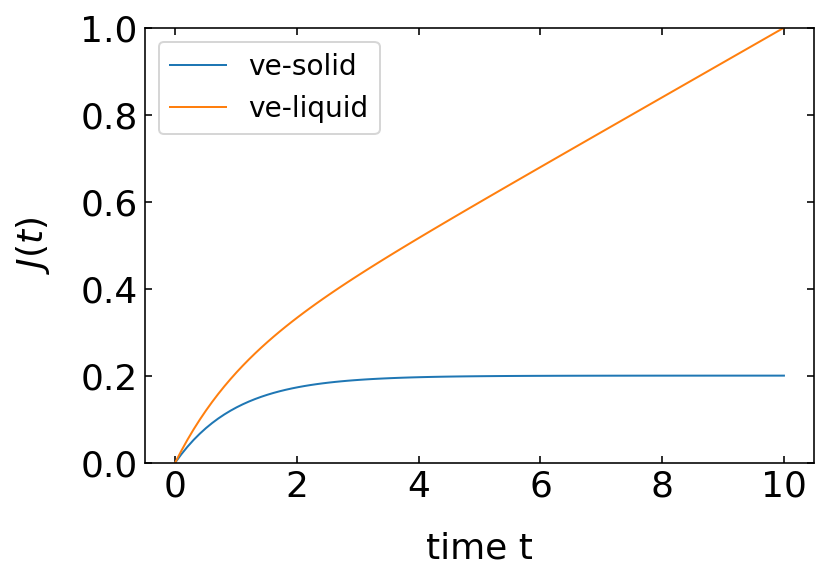

In [16]:
t=np.linspace(0,10,100)
plt.plot(t,0.2*(1-np.exp(-t)),label="ve-solid")
plt.plot(t,0.2*(1-np.exp(-t))+0.08*t,label="ve-liquid")
plt.ylim(0,1)
plt.xlabel("time t")
plt.ylabel(r"$J(t)$")
plt.legend()
plt.show()

### Creep Recovery

When switching of the stress, the viscoelastic material recovers and we get an elastic recoil. The reocovery strain is defined as

$$
\gamma_R =\gamma_0-\gamma(t)
$$

where the switch off happens at $t=0$. The corresponding recovery compliance is then

$$
J_R(t)\equiv\frac{\gamma_R(t)}{\sigma}
$$

which directly gives

$$
J_R(t)=J(t)-\frac{t}{\eta}
$$

for a viscoelastic liquid. For a solid, the viscosity is infinite an we obtain

$$
J_R(t)=J(t)
$$

$$
\lim_{t\rightarrow\infty} J_R(t)=\lim_{t\rightarrow \infty}\left [ J(t)-\frac{t}{\eta}\right ]=J_{eq}
$$

## Oscillatory Shear

All the previous consideration were done in the time domain with step-like perturbations. The step-like perturbation responses have an analog in the frequency domain, which is commonly measured by a type of "spectroscopy", which is termed **rheology**.
In rheology you apply an oscillating strain at a frequency $\omega$, which can be written in the complex form as

$$
\gamma(t)=\gamma_0 \exp(i\omega t)
$$

For a pure eslastic solid, the response in instantaneous an the stress reads:

$$
\sigma(t)=G \gamma(t)=G \gamma_{0} e^{i \omega t}
$$

The stress is osciallting in phase with the strain. For a viscous liquid, however, the stress is related to the strain rate and thus

$$
\sigma(t)=\eta \frac{d \gamma(t)}{d t}=i \omega \eta \gamma_{0} e^{i \omega t}
$$

we obtain an out of phase signal, a purely imaginary response, of the stress, which trails the train as shown in the Figure below.

In [22]:
def gamma(t,omega,gamma0):
    return(gamma0*np.exp(1j*omega*t))

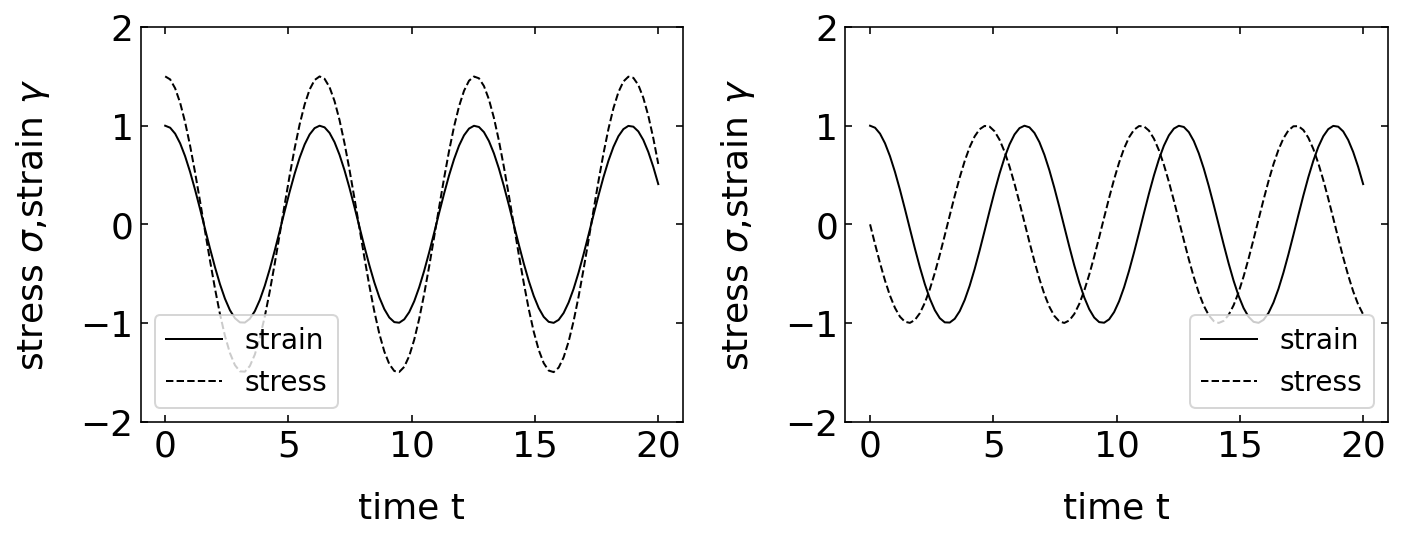

In [46]:
t=np.linspace(0,20,100)
g=gamma(t,1,1);G=1.5;eta=1;omega=1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t,np.real(g),'k-',label="strain")
plt.plot(t,np.real(g*G),'k--',label="stress")
plt.xlabel("time t")
plt.ylabel(r"stress $\sigma$,strain $\gamma$")
plt.legend()
plt.ylim(-2,2)

plt.subplot(1,2,2)
plt.plot(t,np.real(g),'k-',label="strain")
plt.plot(t,np.real(g*1j*omega*eta),'k--',label="stress")
plt.xlabel("time t")
plt.ylabel(r"stress $\sigma$,strain $\gamma$")
plt.legend()
plt.ylim(-2,2)
plt.tight_layout()
plt.show()

For a viscoelastic material, we have now both responses, which we can summarize in a complex modulus $G$. The real part is called the **storage modulus** and the imaginary part is called the **loss modulus**

$$
G(\omega)=G^{\prime}(\omega)+i G^{\prime}(\omega)
$$

Therefore, the time dependent stress is also a complex quantity and given by

$$
\sigma(t)=\underbrace{G \gamma_{0}}_{\sigma_{0}} e^{i \omega t}=\underbrace{G^{\prime} \gamma_{0}}_{\operatorname{Re} \sigma_{0}} e^{i \omega t}+i \underbrace{G^{\prime \prime} \gamma_{0}}_{\operatorname{Im} \sigma_{0}} e^{i \omega t}
$$

The phase angle $\delta$ is given by the ratio of imaginary and real part 

$$
\tan \delta=\frac{\operatorname{Im} G}{\operatorname{Re} G}=\frac{G^{\prime \prime}}{G^{\prime}}
$$

and the tangens of the phase angle is called the **loss tangent**.

$$
P=\frac{d W}{d t}=\frac{F d x}{d t}=\underbrace{\sigma A}_{F} \frac{L d \gamma}{d t}
$$

$$
\frac{P}{V}=\sigma\left(\frac{d \gamma}{d t}\right)
$$

$$
\frac{P}{V}=\frac{1}{2} \sigma_{0}\left(\frac{d \gamma}{d t}\right)_{0}^{*} = \frac{1}{2}\left(G^{\prime} \gamma_{0}+i G^{\prime \prime} \gamma_{0}\right)\left(-i \omega \gamma_{0}\right) =\frac{1}{2}(\underbrace{G^{\prime \prime}}_{\begin{array}{c}
\text { active } \\
\text { power }
\end{array}}-\underbrace{i G^{\prime}}_{\text {reactive }}) \gamma_{0}^{2} \omega
$$

The last part of the equation shows, that the imaginary part is responsible for the dissipation, while the real part adds some pseudo power much like the ac resistance in electronic circuitry.

### Complex shear modulus of the Maxwell model


The elastic part in the Maxwell model is again given by

$$
\gamma_e=\frac{\sigma}{G}
$$

while the viscous part is determined by the following differential equation

$$
\frac{d \gamma_{v}}{d t}=\frac{\sigma}{\eta}=\frac{\sigma_{0}}{\eta} e^{i \omega t}
$$

which yields

$$
\gamma_{v}=\frac{1}{i} \frac{\sigma_{0}}{\omega \eta} e^{i \omega t}=-i \frac{\sigma}{\omega \eta}
$$

or

$$
\sigma=i \omega \eta \gamma_{v}
$$

Thus inserting both in the total strain

$$
\underbrace{\gamma_{0} e^{i \omega t}}_{\gamma}=\underbrace{\frac{\sigma_{0}}{G} e^{i \omega t}}_{\gamma_e}-i\underbrace{ \frac{\sigma_{0}}{\omega \eta} e^{i \omega t}}_{\gamma_v}
$$

from which we can read the complex modulus

\begin{eqnarray}
G^{*}&=&\frac{\sigma_{0}}{\gamma_{0}}=\frac{1}{1 / G-i /(\omega \eta)}=\frac{\omega \eta}{\omega \eta / G-i}=\frac{\omega \eta(\omega \eta / G+i)}{(\omega \underbrace{\eta / G}_{\tau})^{2}+1}\\
&=&\underbrace{G \frac{1}{1+1 /(\omega \tau)^{2}}}_{G^{\prime}}+i \underbrace{G \frac{\omega \tau}{(\omega \tau)^{2}+1}}_{G^{\prime \prime}}\tag{Comlex modulus Maxwell model}
\end{eqnarray}

The plot below shows the frequency dependence of the real and imaginary part of the modulus for the Maxwell model. The imaginary part has the shape of a Lorentzian, which is corresponding to the Fourier transform of an exponential in the time domain. The wings of $G^{\prime \prime}$ increase or decay with $\omega$, while the real part $G^{\prime}$ shows a steeper increase with $\omega^2$ until it saturates. The saturation and the peak occur at the characteristic timescale $\tau=\eta/G$, indicated by the vertical dahsed line.

In [47]:
def G(omega,eta,Gm):
    return(1/(1/Gm-1j/(omega*eta)))

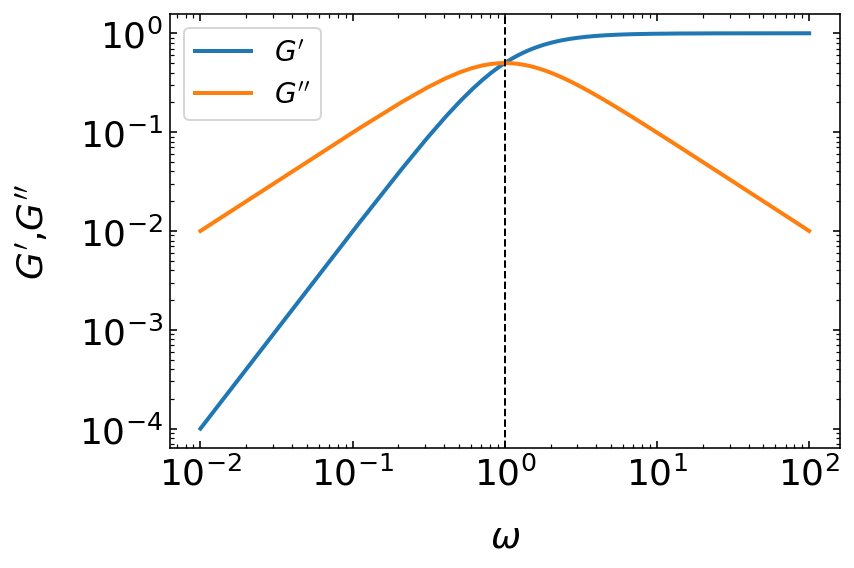

In [59]:
om=np.linspace(0.01,100,1000)
plt.loglog(om,np.real(G(om,1,1)),lw=2,label=r"$G^{\prime}$")
plt.loglog(om,np.imag(G(om,1,1)),lw=2,label=r"$G^{\prime\prime}$")
plt.axvline(x=1,color='k',ls='--')
plt.xlabel(r"$\omega$")
plt.ylabel(r"$G^{\prime}$,$G^{\prime\prime}$")
plt.legend()
plt.show()

### Complex shear modulus of the Kelvin-Voigt model



$$
\underbrace{\sigma_{0} e^{i \omega t}}_{\sigma}=\sigma_{e}+\sigma_{v}=G \gamma+\eta \frac{d \gamma}{d t}=G \gamma_{0} e^{i \omega t}+i \omega \eta \gamma_{0} e^{i \omega t}
$$

$$
G^{*}=\frac{\sigma_{0}}{\gamma_{0}}=G+i \omega \eta=\underbrace{G}_{G^{\prime}}+i \underbrace{G \omega \tau}_{G^{\prime \prime}} \tag{Complex modulus Kelvin-Voigt model}
$$